### Exploratory Data Analysis of Merged Dataset

### Correlation Matrix

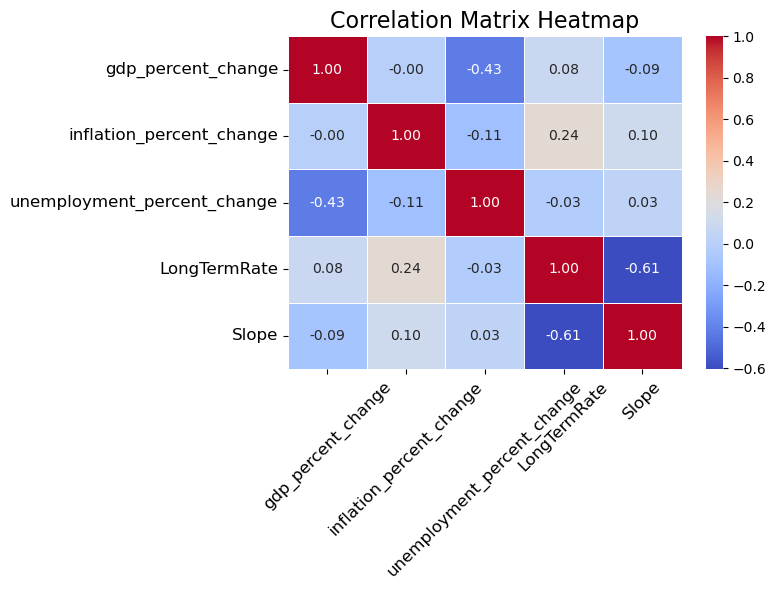

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load merged dataset and set date as index
merged_data = pd.read_csv('data/merged_data.csv')
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
merged_data.set_index('DATE', inplace=True)
merged_data.sort_index(inplace=True)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


### Seasonal Decomposition

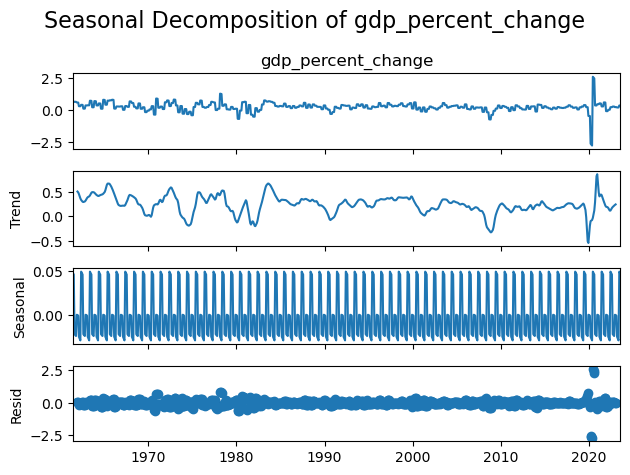

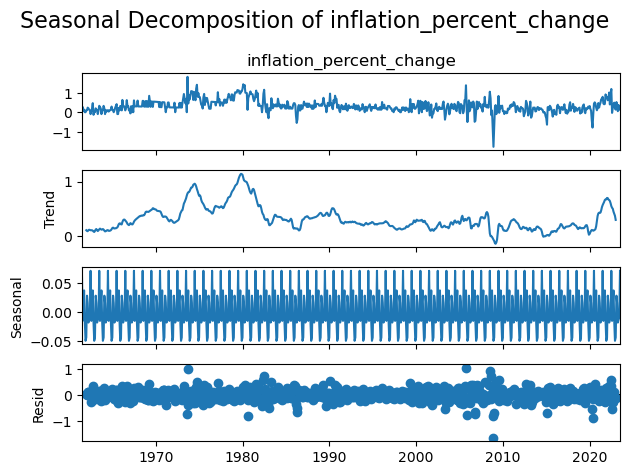

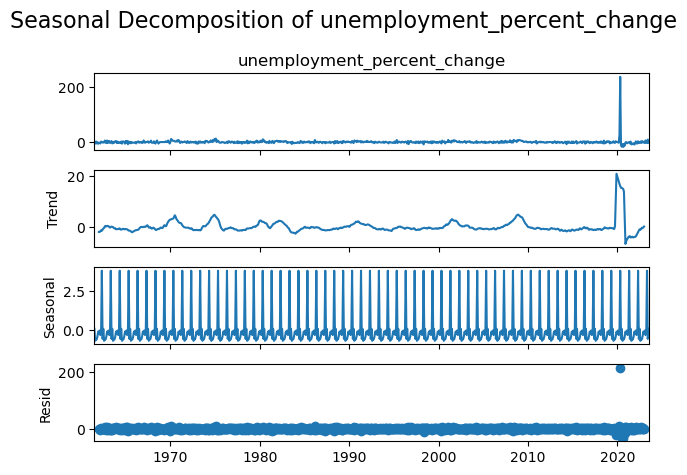

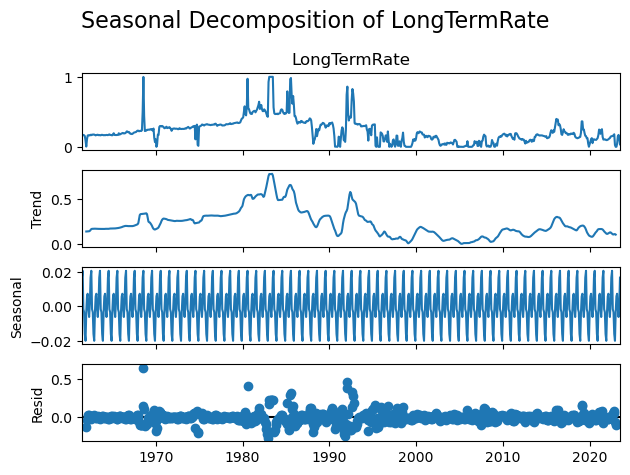

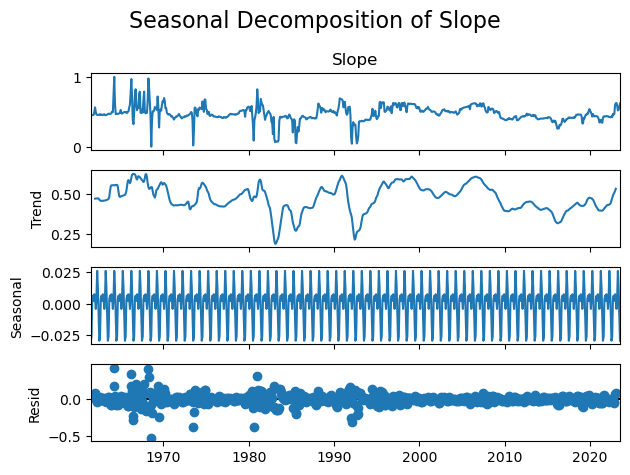

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Define a function for seasonal decomposition
def decompose_and_plot(data, column, model='additive', period=12):
    result = seasonal_decompose(data[column], model=model, period=period)
    result.plot()
    plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Apply decomposition to all relevant columns
columns_to_decompose = ['gdp_percent_change', 'inflation_percent_change', 
                        'unemployment_percent_change', 'LongTermRate', 'Slope']

for col in columns_to_decompose:
    decompose_and_plot(merged_data, col)
